Comparison of vertical velocities at a fixed depth (3D cases and CNT)
==

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [3]:
# Functions
def vertTrans(Mask, W,zlim=30):
    mask_expand = np.expand_dims(Mask[zlim,227:267,120:240],0)
    mask_expand = mask_expand + np.zeros(W[:,zlim,227:267,120:240].shape)

    vert = W[:,zlim,227:267,120:240]
    VertTrans= np.sum(np.sum(np.ma.masked_array(vert,mask = mask_expand),axis=1),axis=1)
    return VertTrans


In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonState3D4='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc'
CanyonState3D4Out = Dataset(CanyonState3D4)

CanyonState3D6='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc'
CanyonState3D6Out = Dataset(CanyonState3D6)


In [5]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc =  CanyonGridOut.variables['RC'] # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')
rA = rout.getField(CanyonGrid, 'rA')


In [6]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [7]:
# TRACER 1



In [8]:
WCNT = rout.getField(CanyonState,'W')
W43D = rout.getField(CanyonState3D4,'W')
W63D = rout.getField(CanyonState3D6,'W')

   

In [9]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(WCNT.shape)


WCNT= np.ma.masked_array(WCNT,mask = mask_expand)
W43D= np.ma.masked_array(W43D,mask = mask_expand)
W63D= np.ma.masked_array(W63D,mask = mask_expand)
 

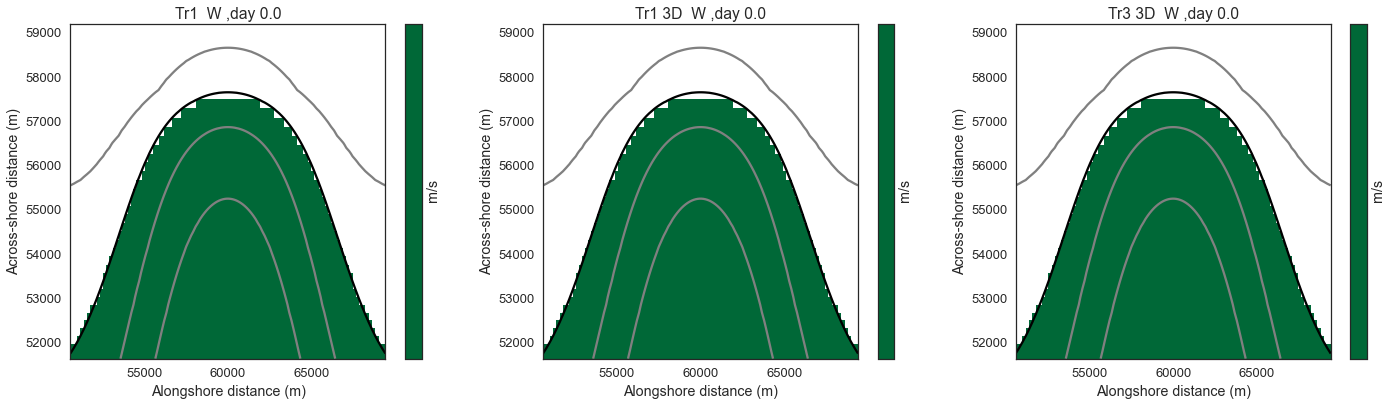

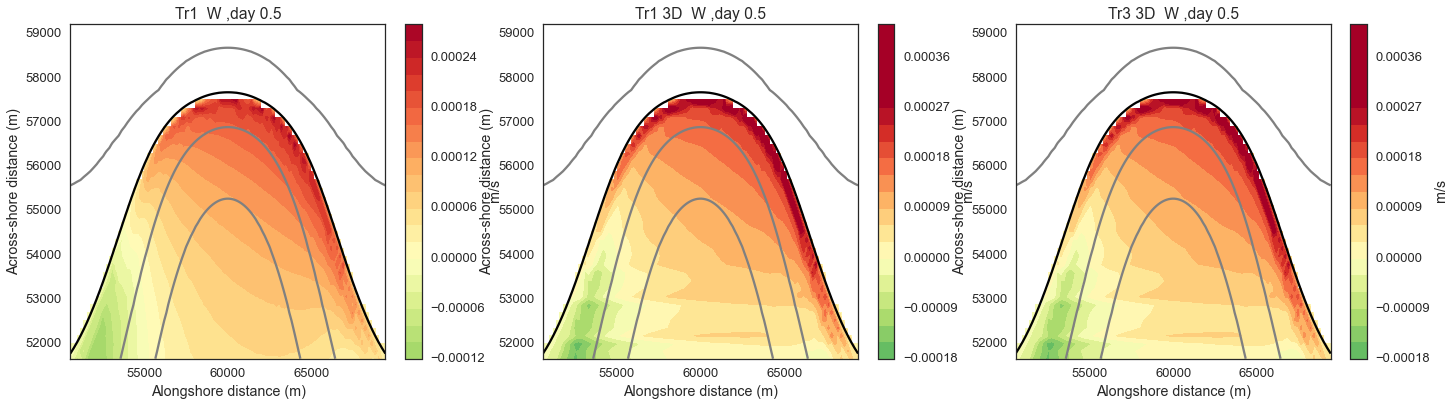

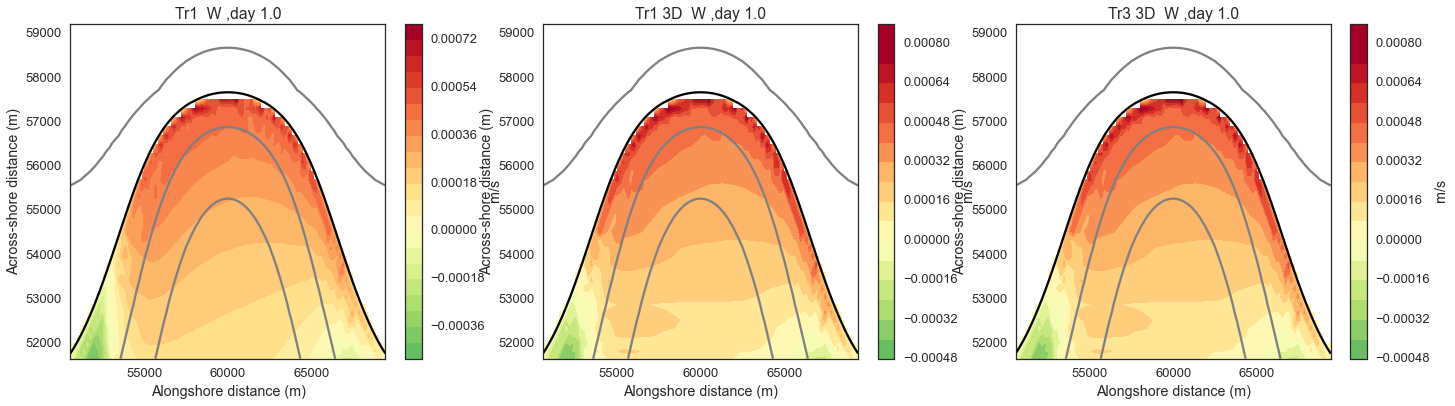

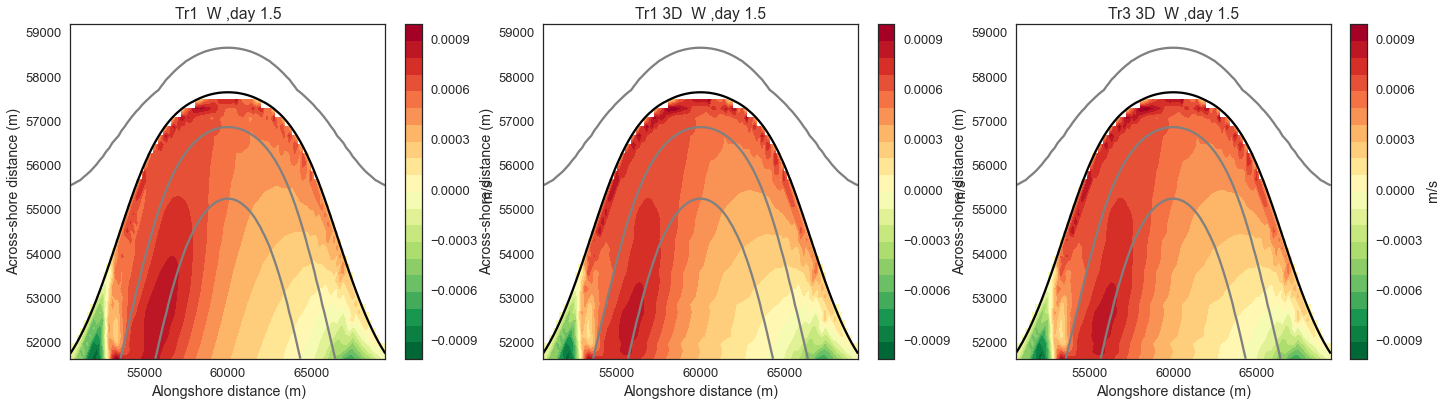

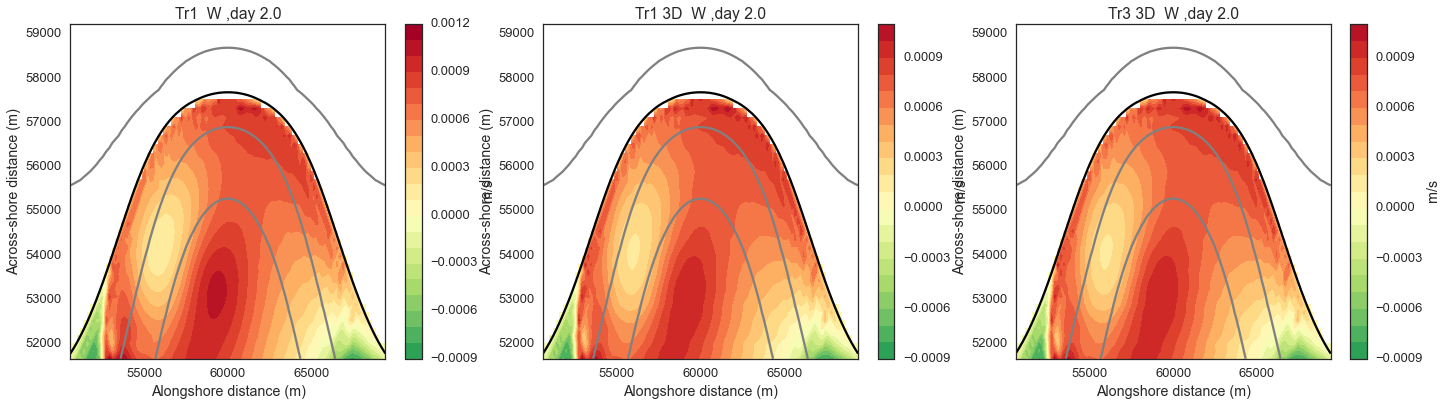

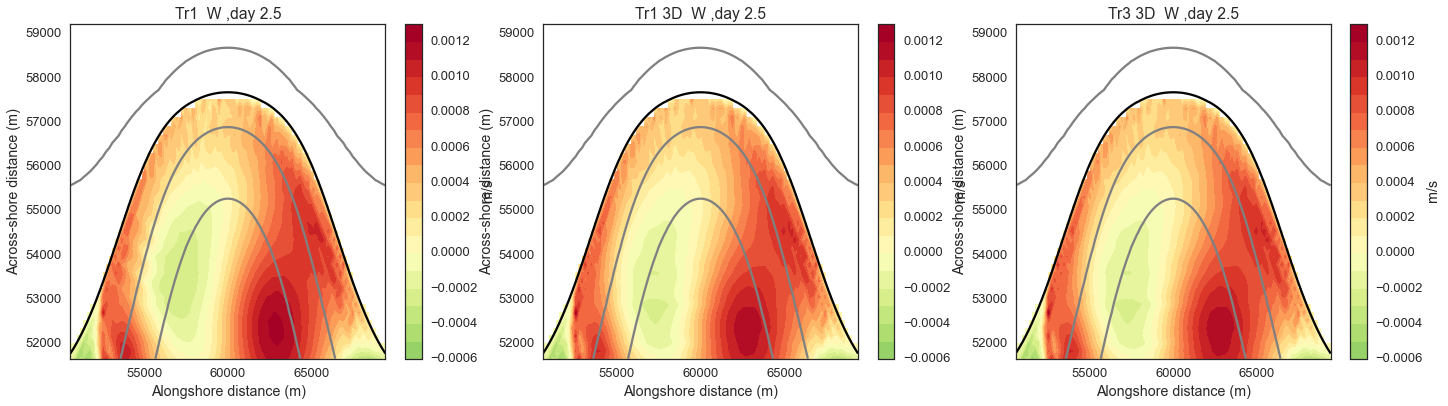

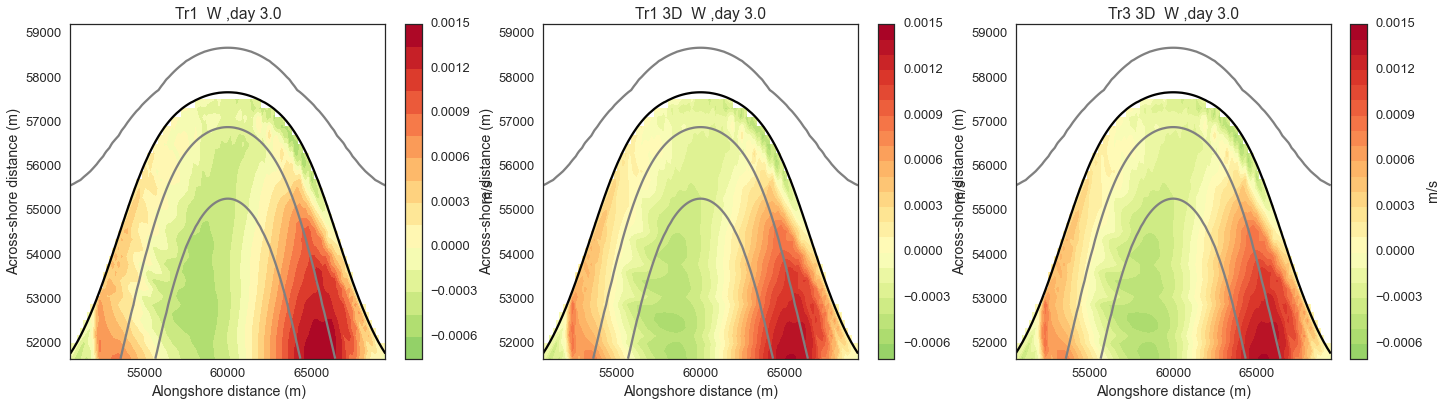

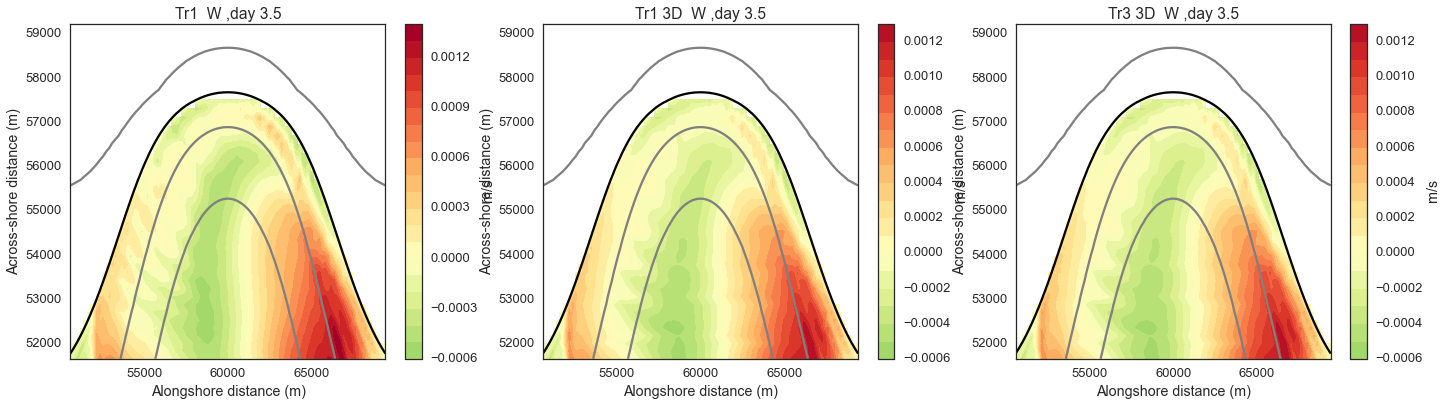

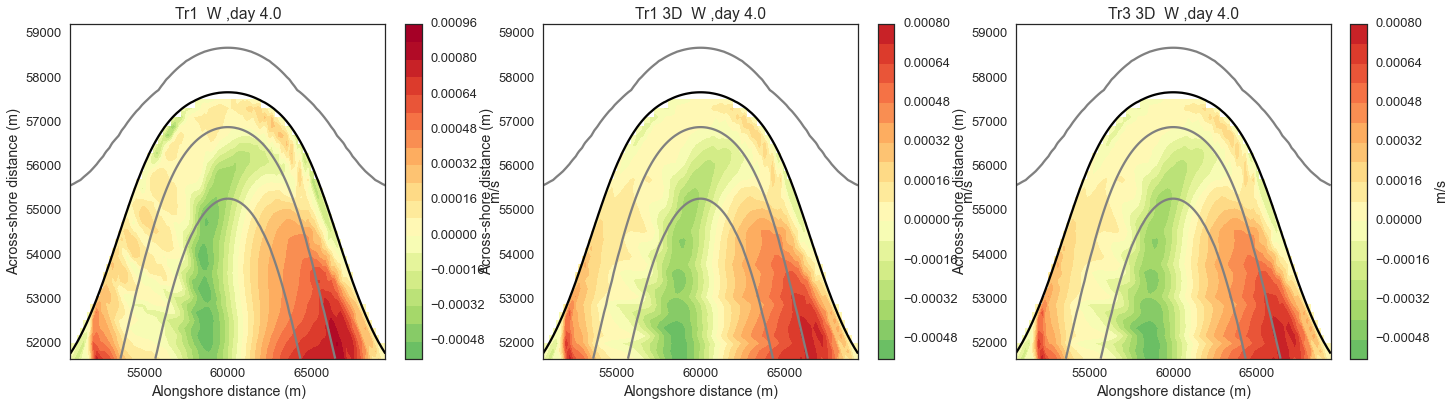

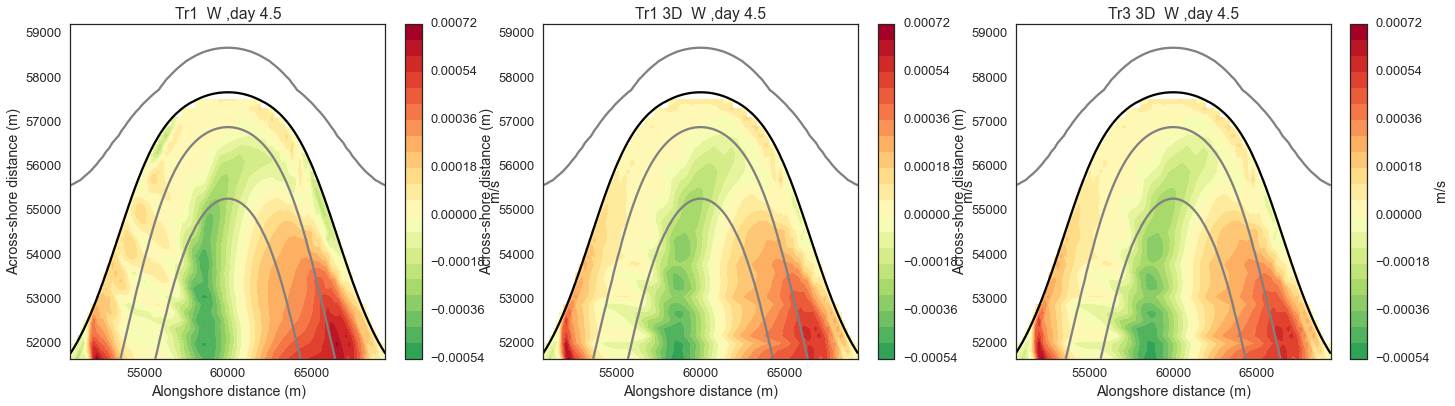

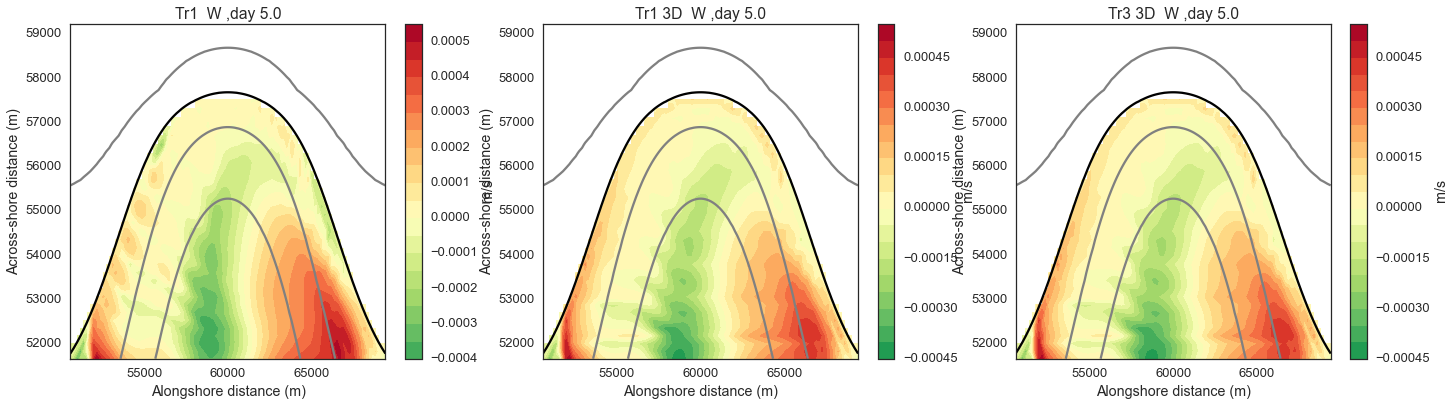

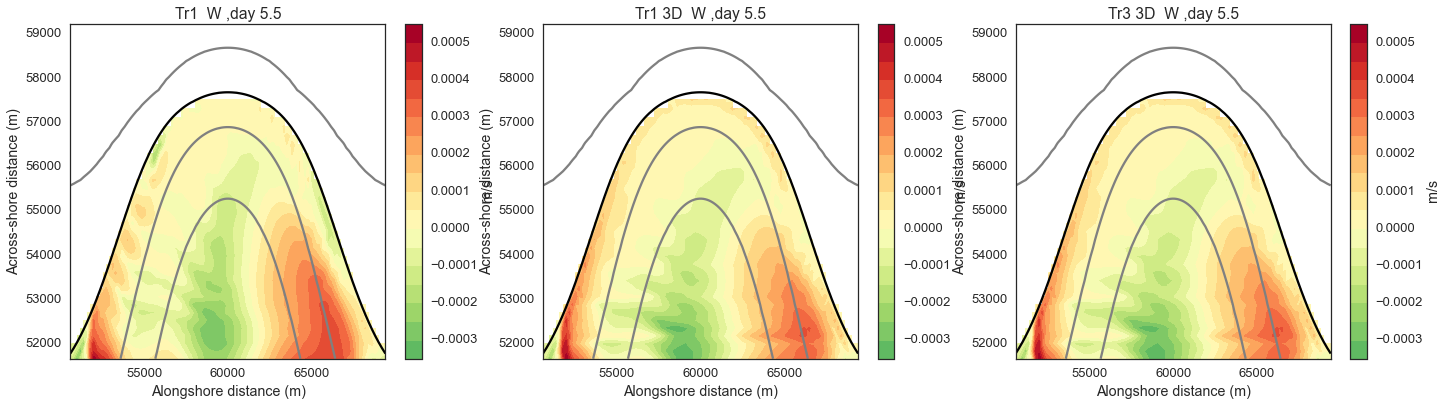

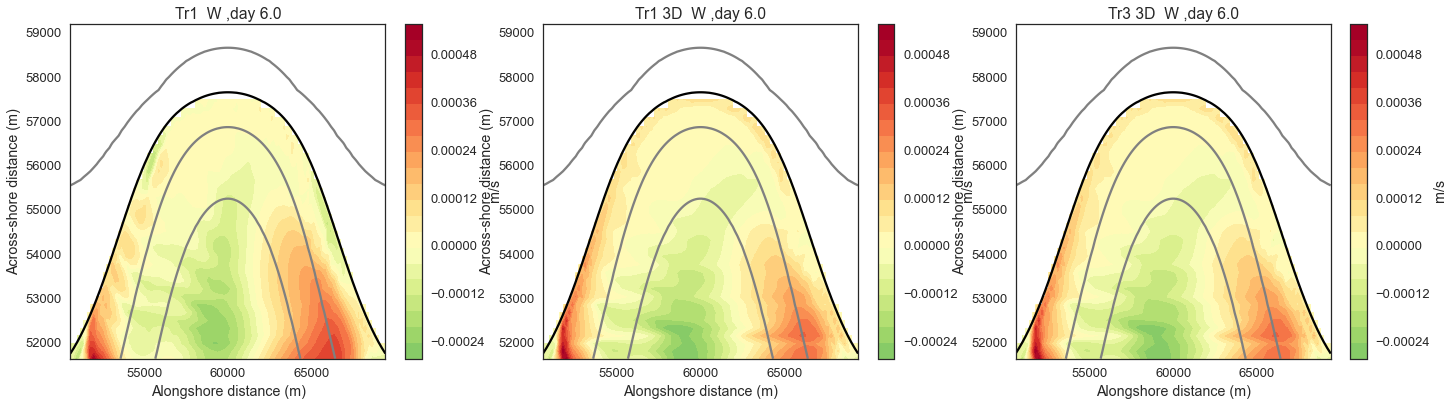

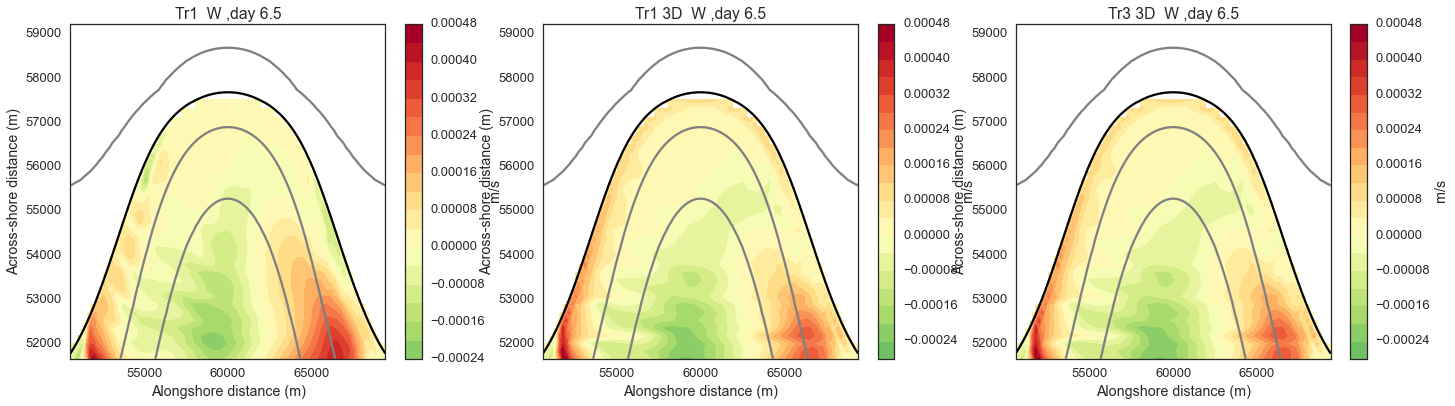

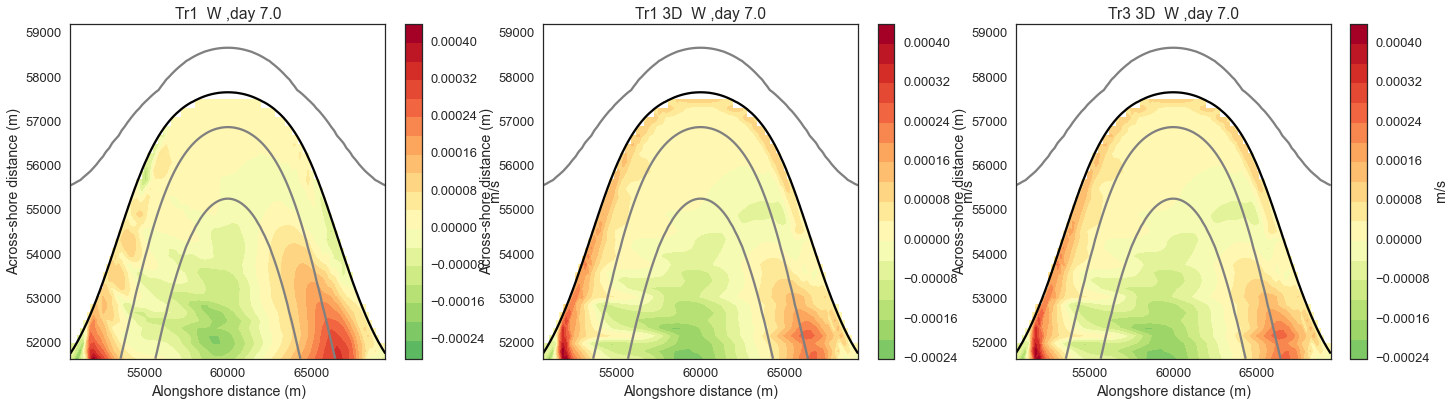

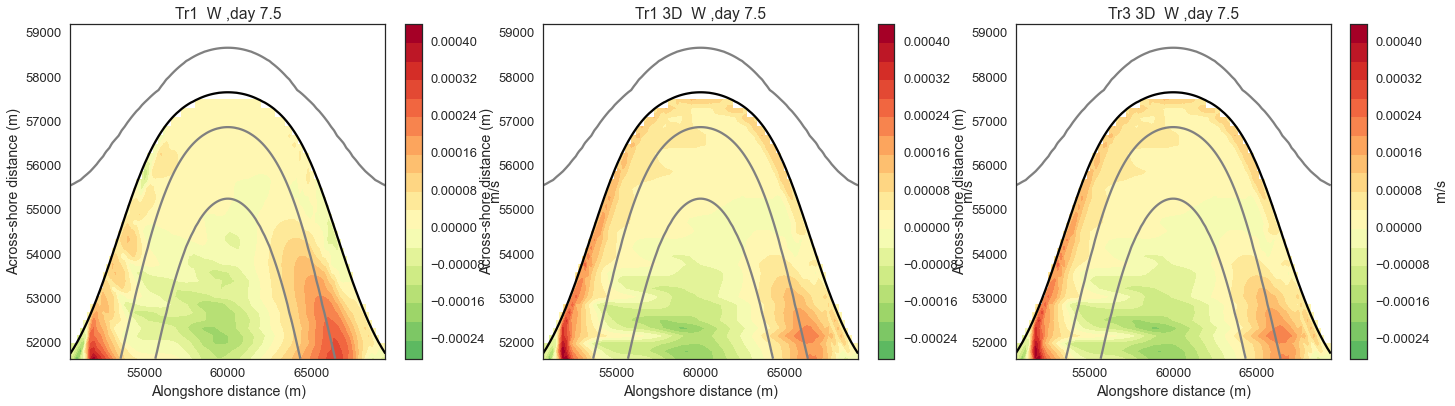

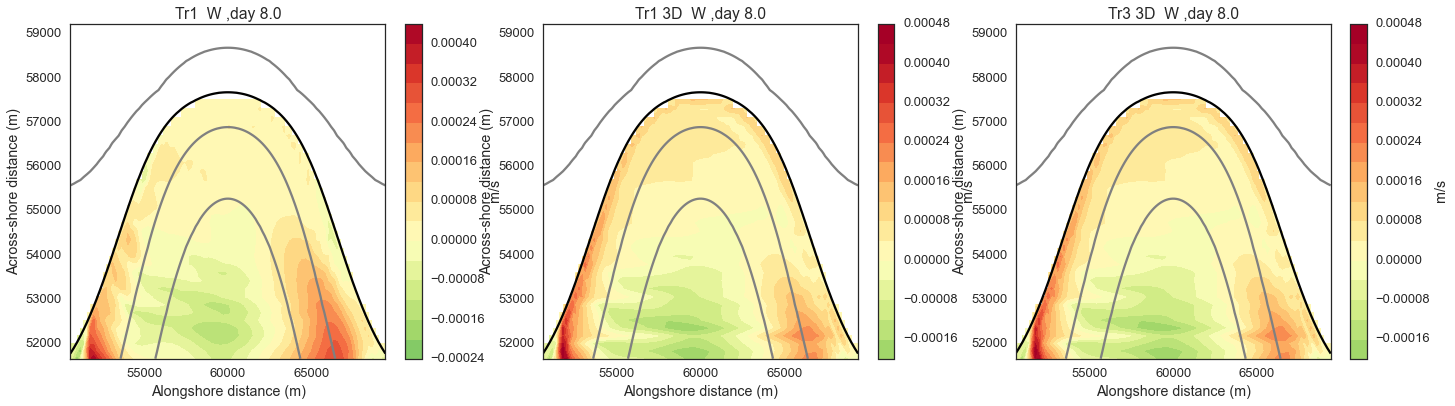

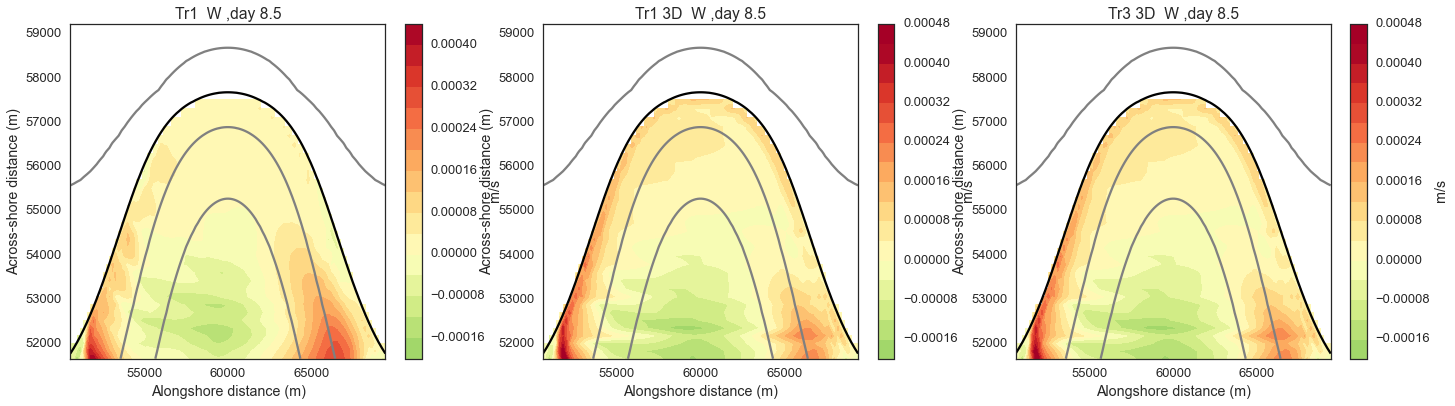

In [10]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

zlevel = 30

for tt in range(18):
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(24, 6))
    
    iso = ax1.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT[tt,zlevel,227:267,120:240],20,cmap='RdYlGn_r',
                       vmin=-np.max(WCNT[tt,zlevel,227:267,120:240]), vmax=np.max(WCNT[tt,zlevel,227:267,120:240]))
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    cb.set_label('m/s')
    cset = ax1.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Tr1  W ,day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax2.contourf(xc[227:267,120:240],yc[227:267,120:240],W43D[tt,zlevel,227:267,120:240],20,cmap='RdYlGn_r',
                       vmin=-np.max(WCNT[tt,zlevel,227:267,120:240]), vmax=np.max(WCNT[tt,zlevel,227:267,120:240]))
    cb = plt.colorbar(iso, shrink=1,ax=ax2)
    cb.set_label('m/s')
    cset = ax2.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Tr1 3D  W ,day %0.1f ' %(tt/2.0))
    ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax3.contourf(xc[227:267,120:240],yc[227:267,120:240],W63D[tt,zlevel,227:267,120:240],20,cmap='RdYlGn_r',
                       vmin=-np.max(WCNT[tt,zlevel,227:267,120:240]), vmax=np.max(WCNT[tt,zlevel,227:267,120:240]))
    cb = plt.colorbar(iso, shrink=1,ax=ax3)
    cb.set_label('m/s')
    cset = ax3.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax3.set_aspect('auto')
    ax3.set_title('Tr3 3D  W ,day %0.1f ' %(tt/2.0))
    ax3.set_ylabel('Across-shore distance (m)')
    ax3.set_xlabel('Alongshore distance (m)')
    
    
    
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

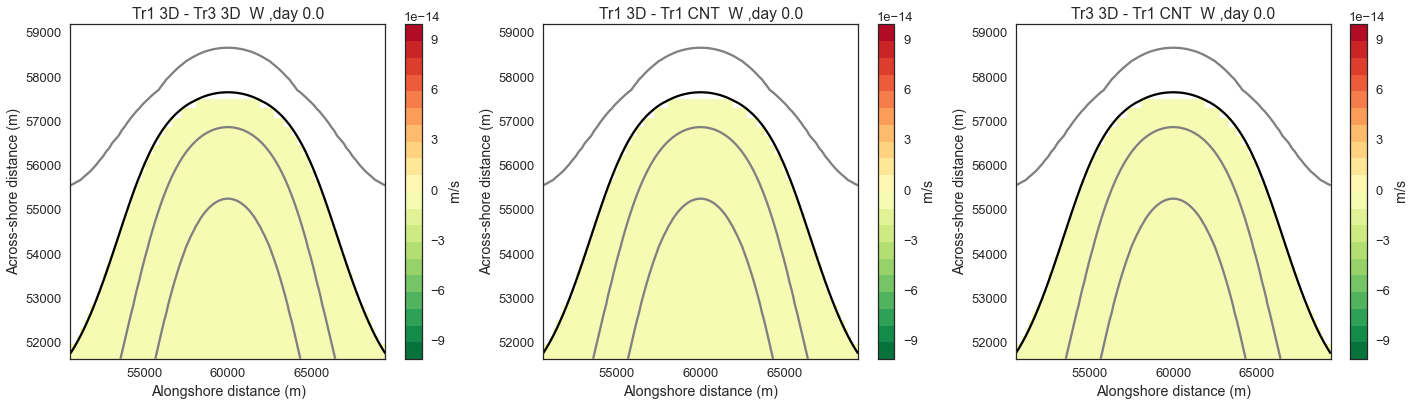

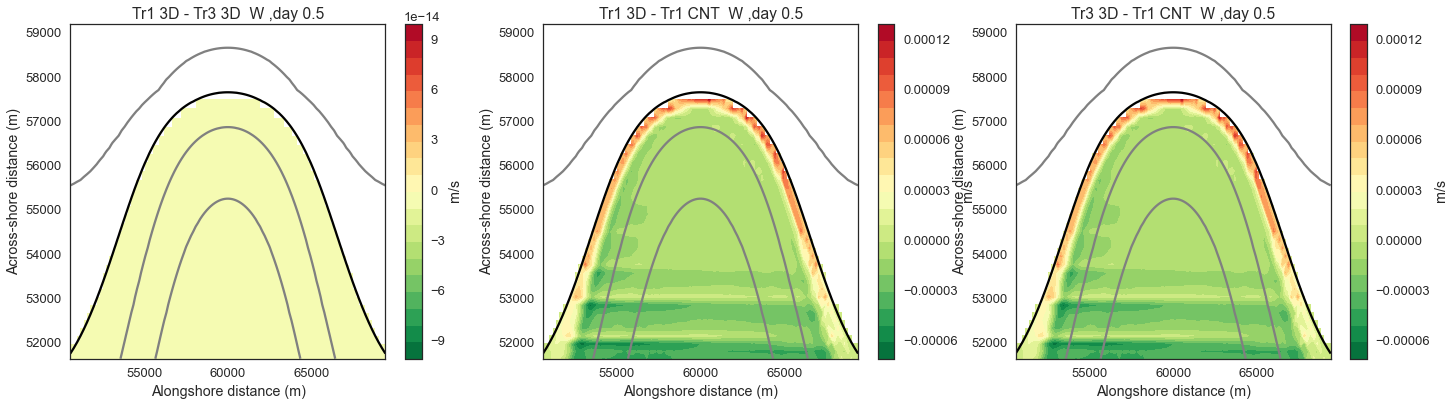

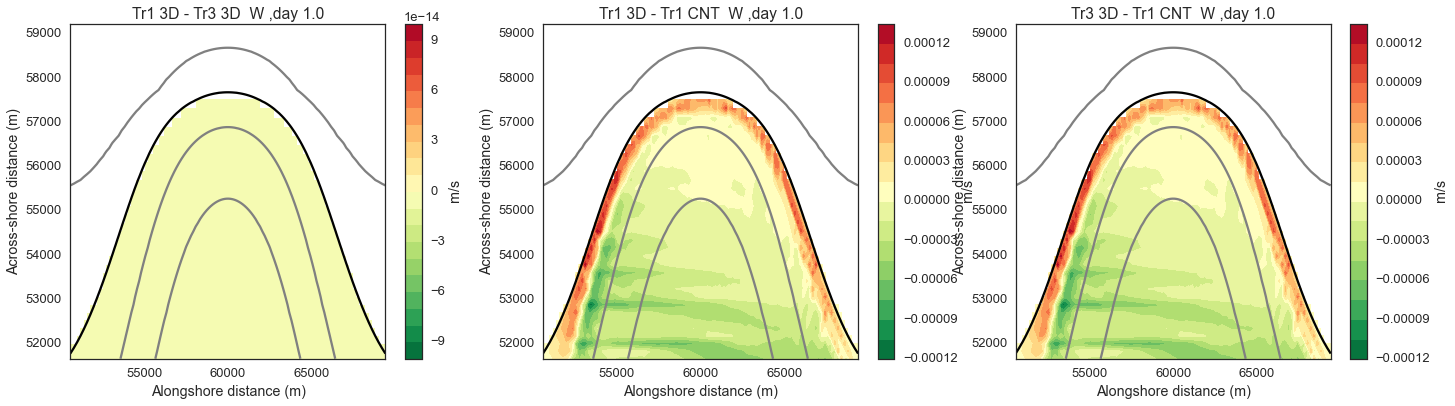

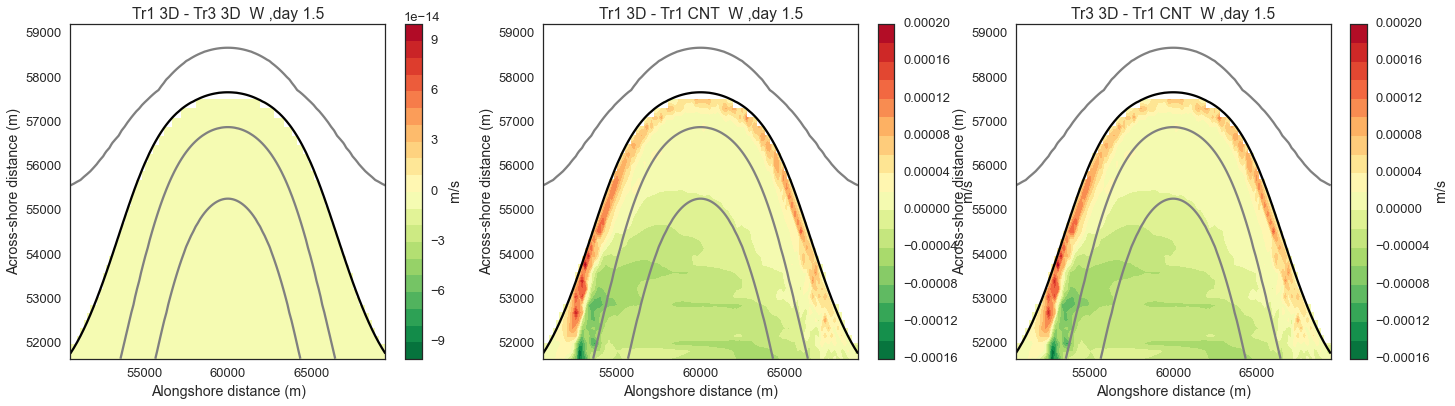

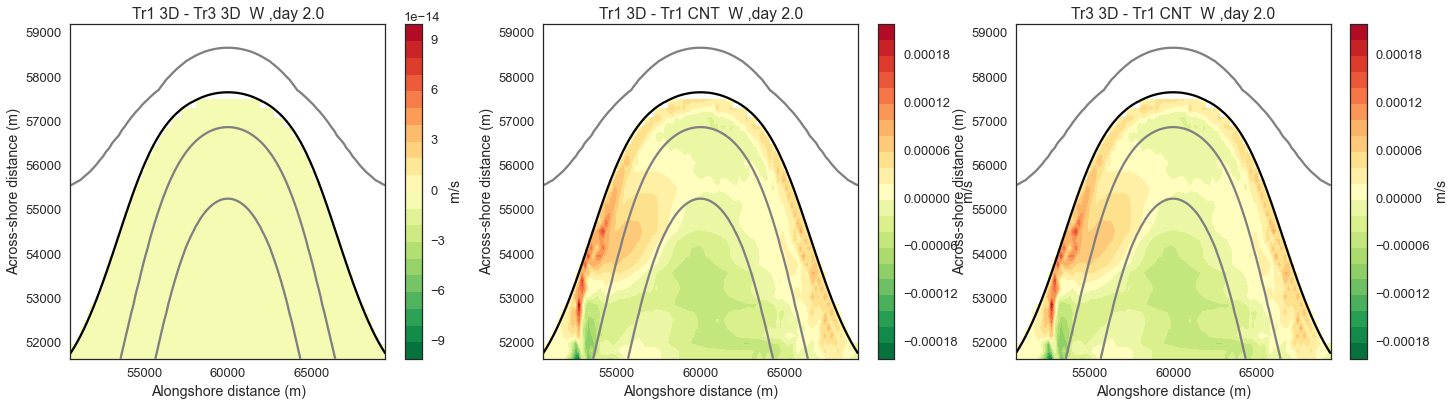

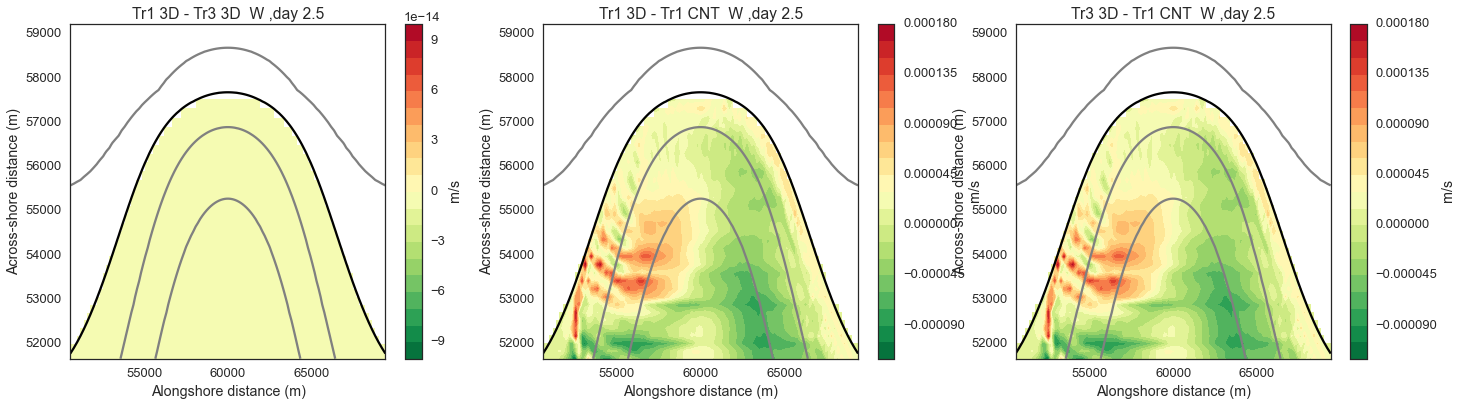

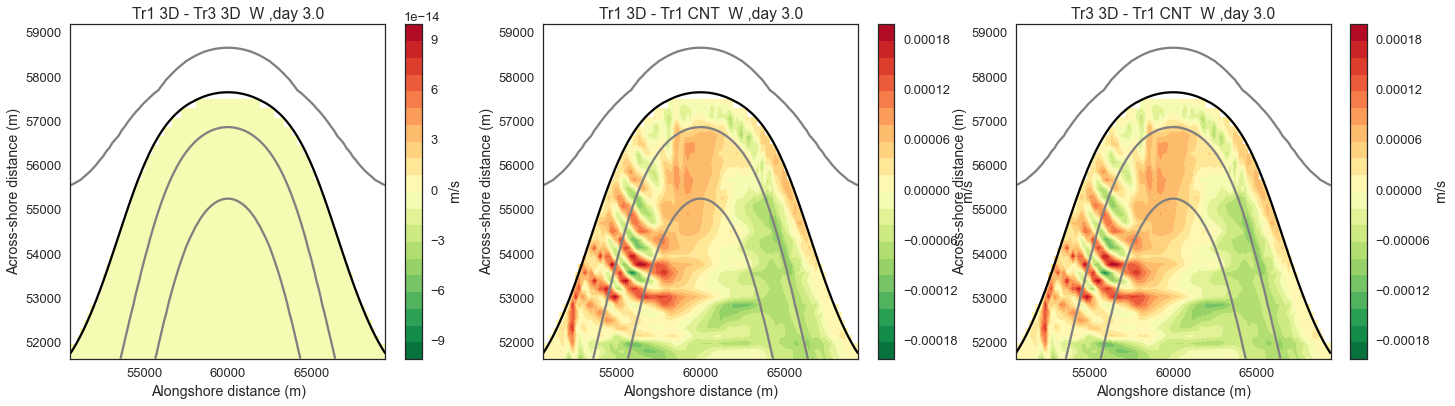

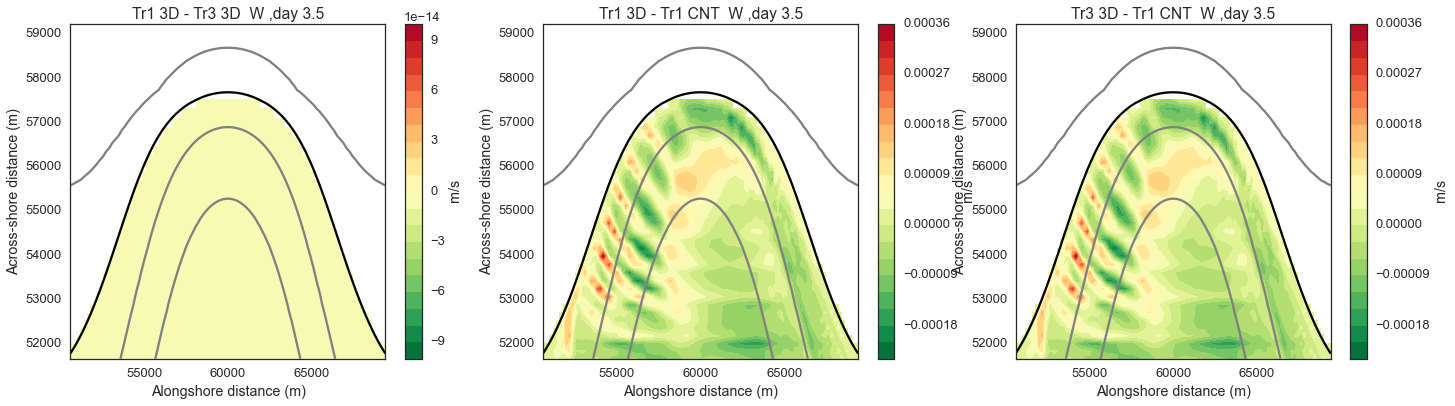

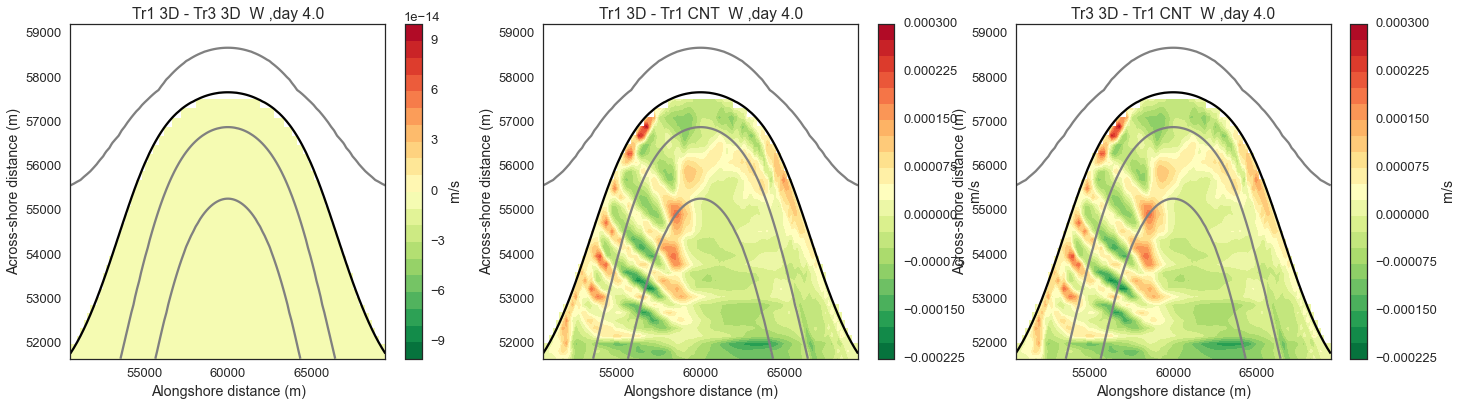

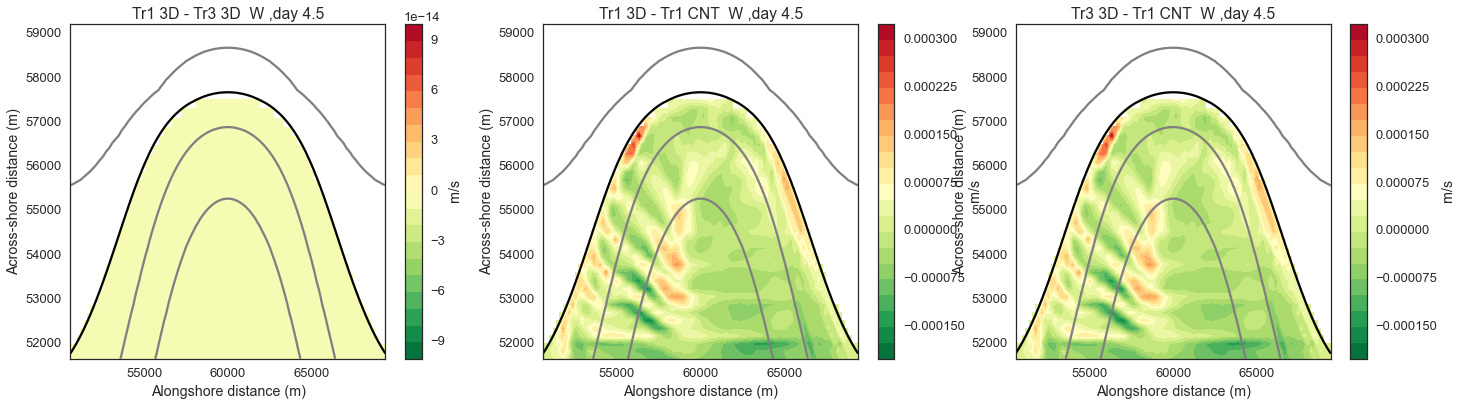

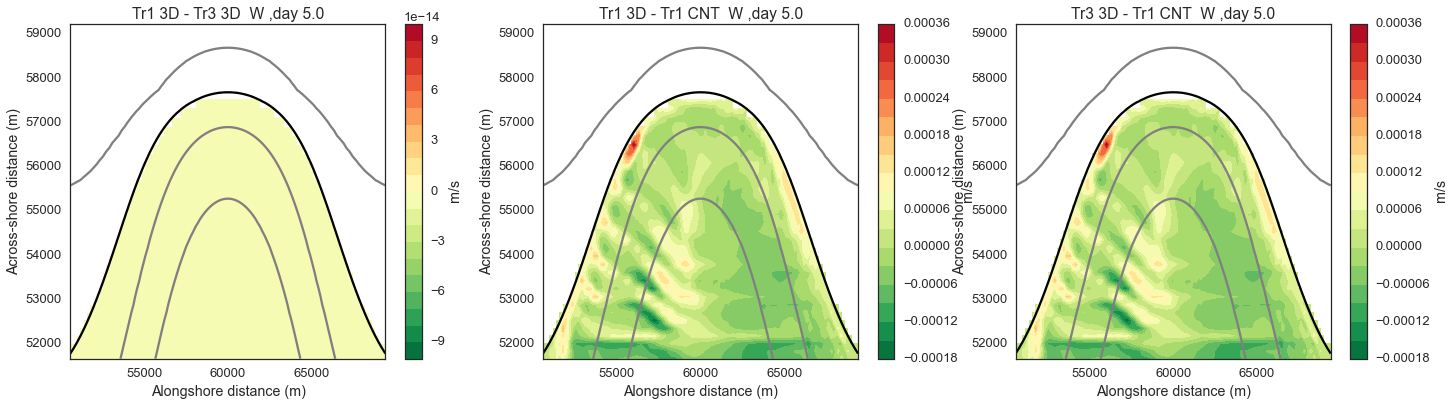

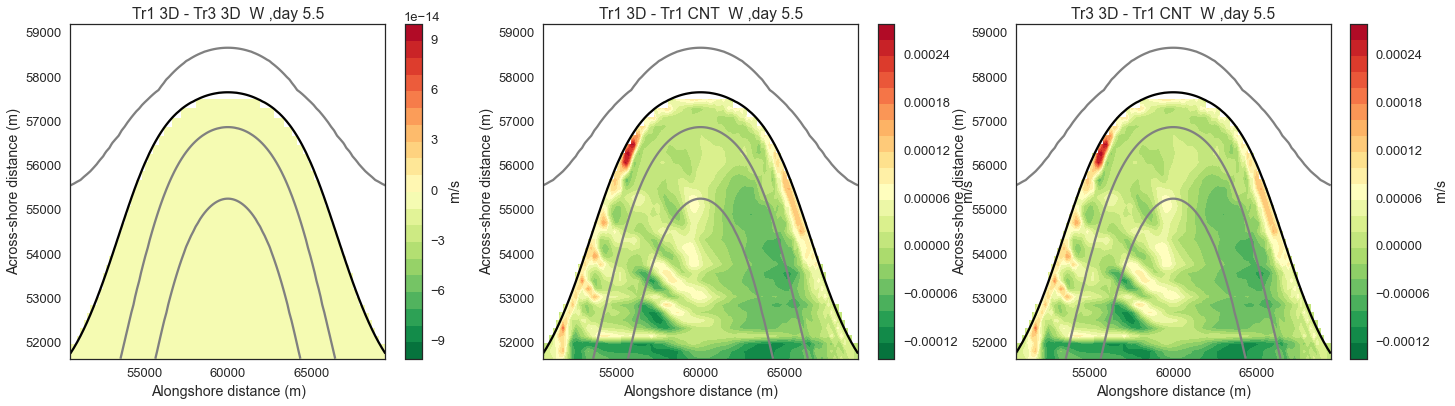

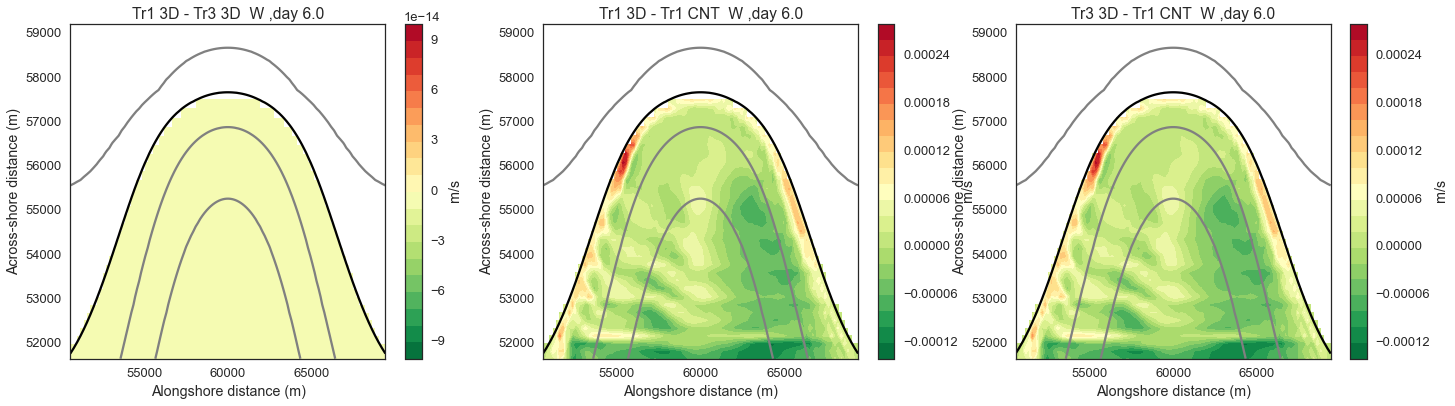

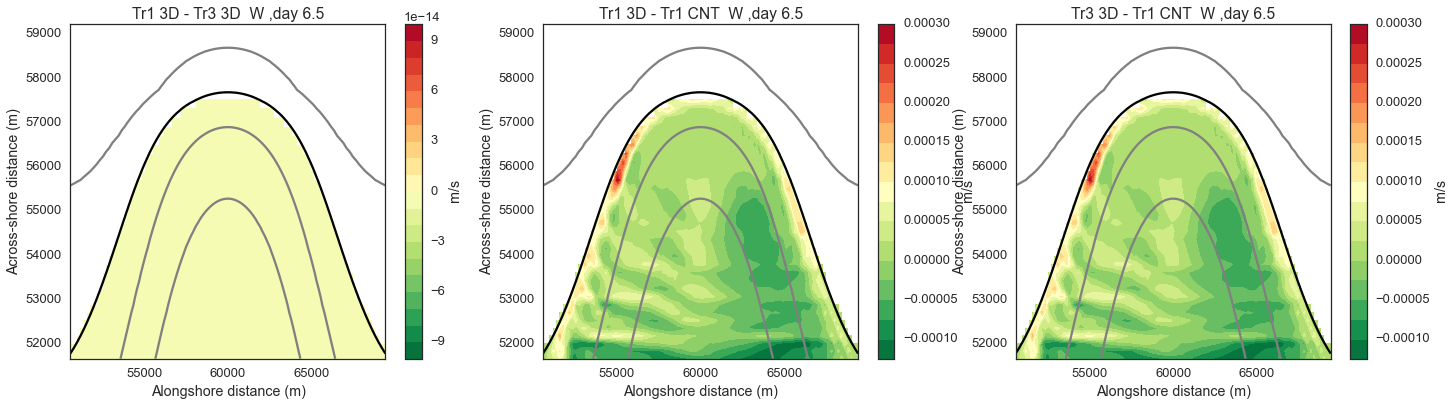

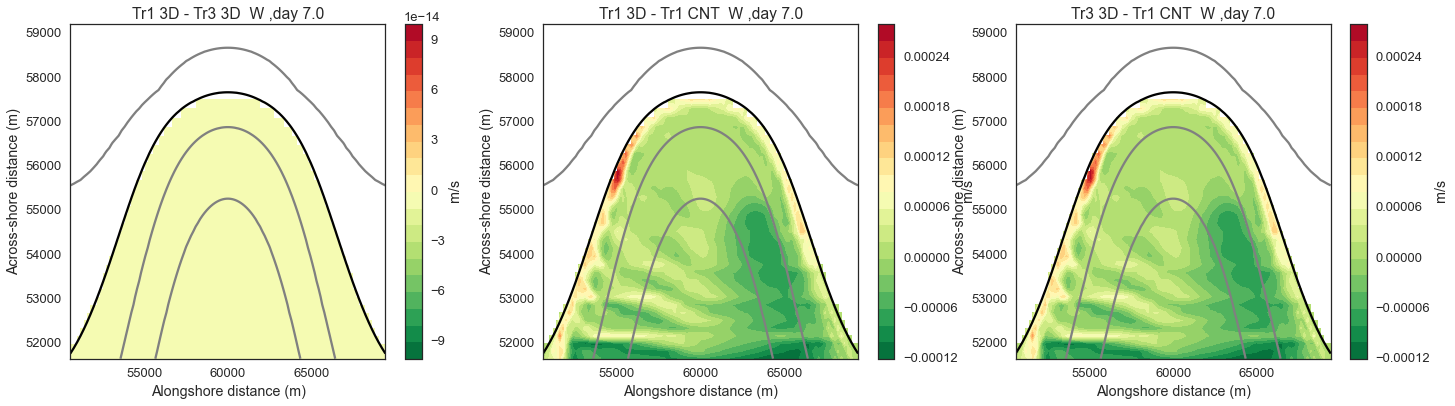

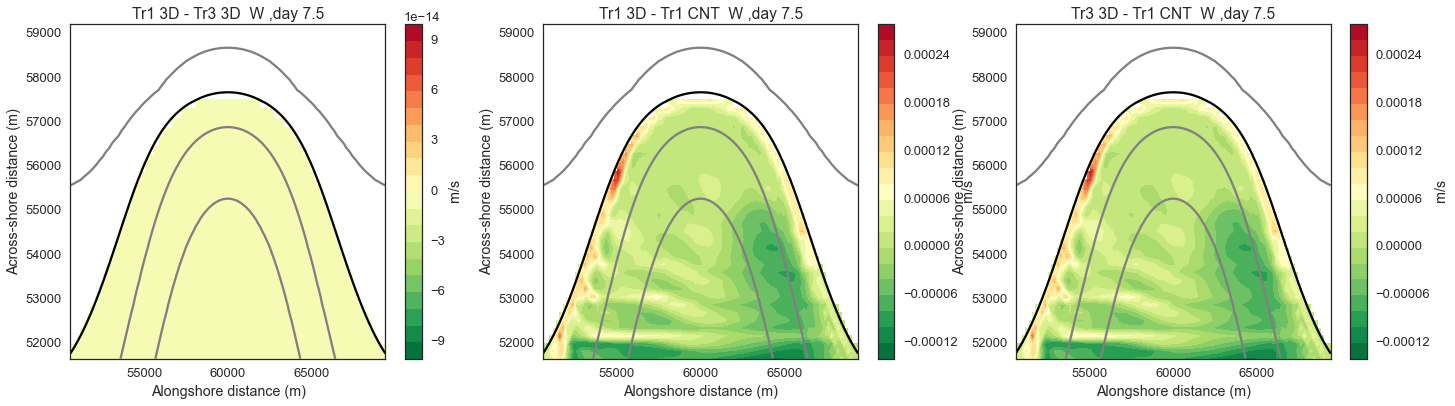

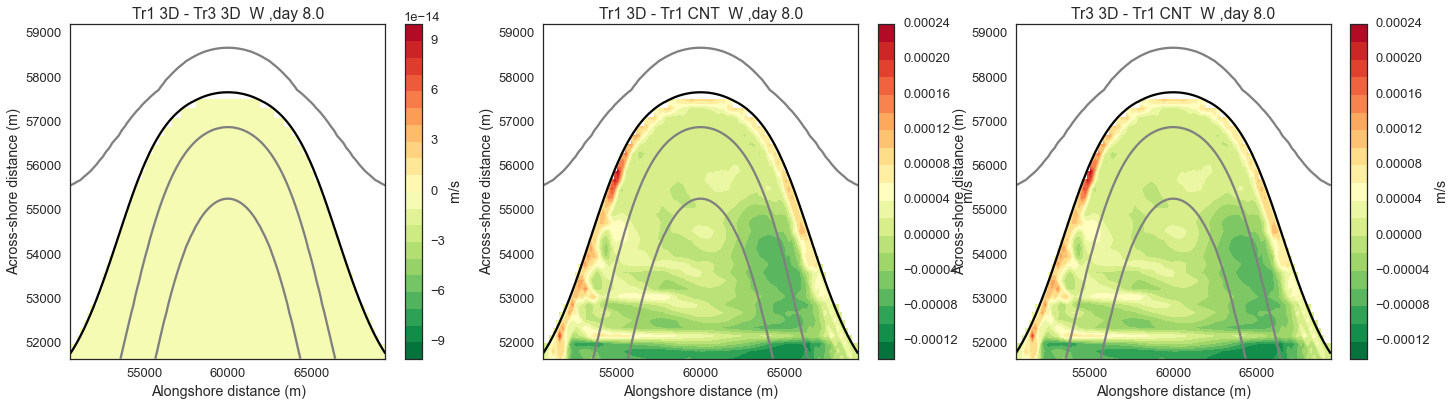

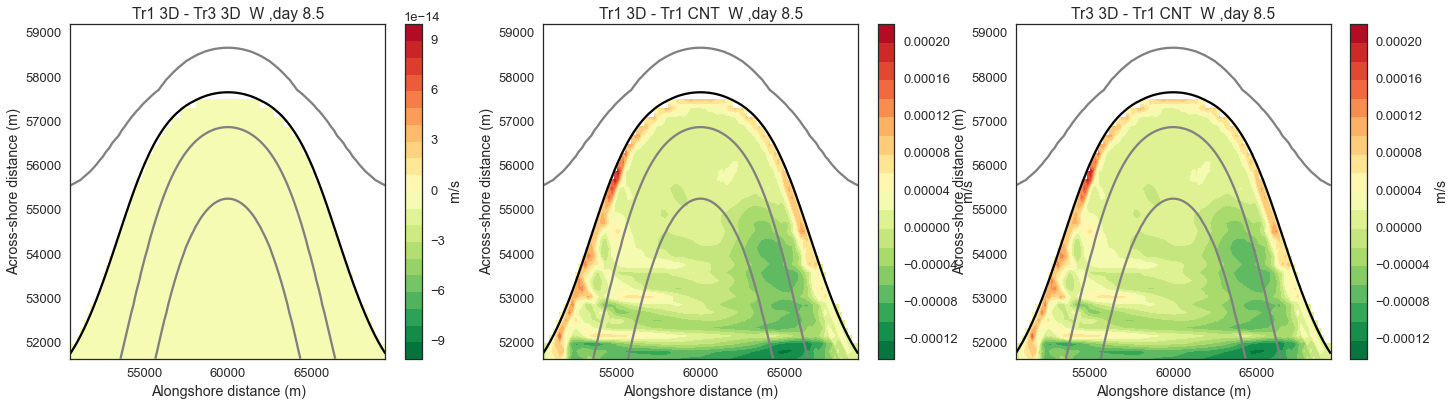

In [11]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

zlevel = 30

for tt in range(18):
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(24,6 ))
    
    iso = ax1.contourf(xc[227:267,120:240],yc[227:267,120:240],W43D[tt,zlevel,227:267,120:240]-W63D[tt,zlevel,227:267,120:240],
                       20,cmap='RdYlGn_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    cb.set_label('m/s')
    cset = ax1.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Tr1 3D - Tr3 3D  W ,day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax2.contourf(xc[227:267,120:240],yc[227:267,120:240],W43D[tt,zlevel,227:267,120:240]-WCNT[tt,zlevel,227:267,120:240],
                       20,cmap='RdYlGn_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax2)
    cb.set_label('m/s')
    cset = ax2.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Tr1 3D - Tr1 CNT  W ,day %0.1f ' %(tt/2.0))
    ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax3.contourf(xc[227:267,120:240],yc[227:267,120:240],W63D[tt,zlevel,227:267,120:240]-WCNT[tt,zlevel,227:267,120:240],
                       20,cmap='RdYlGn_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax3)
    cb.set_label('m/s')
    cset = ax3.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax3.set_aspect('auto')
    ax3.set_title('Tr3 3D - Tr1 CNT  W ,day %0.1f ' %(tt/2.0))
    ax3.set_ylabel('Across-shore distance (m)')
    ax3.set_xlabel('Alongshore distance (m)')
    
    
    
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

In [12]:
FluxTr01CNT = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc' 
FluxTr03CNT = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR03Glob.nc' 
FluxTR013d4 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc' 
#FluxTR013d6 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/FluxTR01Glob.nc' 


WTRAC01CNT = rout.getField(FluxTr01CNT,'WTRAC01') #
WTRAC03CNT = rout.getField(FluxTr03CNT,'WTRAC03') #
WTRAC043D = rout.getField(FluxTR013d4,'WTRAC01') # 
#WTRAC063D = rout.getField(FluxTR013d6,'WTRAC01') # 


In [13]:
WDIFF01CNT3 = rout.getField(FluxTr01CNT,'DFrETr01') #
WDIFF03CNT3 = rout.getField(FluxTr03CNT,'DFrETr03') #
WDIFF013D4 = rout.getField(FluxTR013d4,'DFrETr01') #
#WDIFF013D6 = rout.getField(FluxTR013d6,'DFrETr01') #

WADV01CNT3 = rout.getField(FluxTr01CNT,'ADVrTr01') #
WADV03CNT3 = rout.getField(FluxTr03CNT,'ADVrTr03') #
WADV013D4 = rout.getField(FluxTR013d4,'ADVrTr01') #
#WADV013D6 = rout.getField(FluxTR013d6,'ADVrTr01') #


In [14]:
WDIFF01CNT3i = rout.getField(FluxTr01CNT,'DFrITr01') #
WDIFF03CNT3i = rout.getField(FluxTr03CNT,'DFrITr03') #
WDIFF013D4i = rout.getField(FluxTR013d4,'DFrITr01') #
#WDIFF013D6i = rout.getField(FluxTR013d6,'DFrITr01') #


In [15]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(WTRAC01CNT.shape)


WTRAC01CNT= np.ma.masked_array(WTRAC01CNT,mask = mask_expand)
WTRAC03CNT= np.ma.masked_array(WTRAC03CNT,mask = mask_expand)
WTRAC043D= np.ma.masked_array(WTRAC043D,mask = mask_expand)
#WTRAC063D= np.ma.masked_array(WTRAC063D,mask = mask_expand)
 

In [16]:
WDIFF01CNT3= np.ma.masked_array(WDIFF01CNT3,mask = mask_expand)
WDIFF03CNT3= np.ma.masked_array(WDIFF03CNT3,mask = mask_expand)
WDIFF013D4= np.ma.masked_array(WDIFF013D4,mask = mask_expand)
#WDIFF013D6= np.ma.masked_array(WDIFF013D6,mask = mask_expand)

WADV01CNT3= np.ma.masked_array(WADV01CNT3,mask = mask_expand)
WADV03CNT3= np.ma.masked_array(WADV03CNT3,mask = mask_expand)
WADV013D4= np.ma.masked_array(WADV013D4,mask = mask_expand)
#WADV013D6= np.ma.masked_array(WADV013D6,mask = mask_expand)


In [17]:
WDIFF01CNT3i= np.ma.masked_array(WDIFF01CNT3i,mask = mask_expand)
WDIFF03CNT3i= np.ma.masked_array(WDIFF03CNT3i,mask = mask_expand)
WDIFF013D4i= np.ma.masked_array(WDIFF013D4i,mask = mask_expand)
#WDIFF013D6i= np.ma.masked_array(WDIFF013D6i,mask = mask_expand)


In [18]:
ptracers3='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
ptracers3d4='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
#ptracers3d6='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'

Tr1 = rout.getField(ptracers3,'Tr1') #
Tr3 = rout.getField(ptracers3,'Tr3') #
Tr13d4 = rout.getField(ptracers3d4,'Tr1') # 
#Tr13d6 = rout.getField(ptracers3d6,'Tr1') # 


In [19]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(Tr1.shape)

Tr1= np.ma.masked_array(Tr1,mask = mask_expand)
Tr3= np.ma.masked_array(Tr3,mask = mask_expand)
Tr13d4= np.ma.masked_array(Tr13d4,mask = mask_expand)
#Tr13d6= np.ma.masked_array(Tr13d6,mask = mask_expand)


In [1]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})
sns.set_style('whitegrid')

zlevel = 30

trac1 = (np.sum(np.sum(Tr1[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1))/np.sum(rA[227:267,120:240])
trac2 = (np.sum(np.sum(Tr3[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1))/np.sum(rA[227:267,120:240])
trac3 = (np.sum(np.sum(Tr13d4[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1))/np.sum(rA[227:267,120:240])
#trac4 = (np.sum(np.sum(Tr13d6[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1))/np.sum(rA[227:267,120:240])

W3trans = np.sum(np.sum(WCNT[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W2trans = np.sum(np.sum(W43D[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W4trans = np.sum(np.sum(W63D[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

W3trac = np.sum(np.sum(WTRAC01CNT[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W2trac = np.sum(np.sum(WTRAC03CNT[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W4trac = np.sum(np.sum(WTRAC043D[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
#W5trac = np.sum(np.sum(WTRAC063D[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

W3diff = np.sum(np.sum(WDIFF01CNT3[:,zlevel,227:267,120:240],axis=2),axis=1)
W2diff = np.sum(np.sum(WDIFF03CNT3[:,zlevel,227:267,120:240],axis=2),axis=1)
W4diff = np.sum(np.sum(WDIFF013D4[:,zlevel,227:267,120:240],axis=2),axis=1)
#W5diff = np.sum(np.sum(WDIFF013D6[:,zlevel,227:267,120:240],axis=2),axis=1)

W3diffi = np.sum(np.sum(WDIFF01CNT3i[:,zlevel,227:267,120:240],axis=2),axis=1)
W2diffi = np.sum(np.sum(WDIFF03CNT3i[:,zlevel,227:267,120:240],axis=2),axis=1)
W4diffi = np.sum(np.sum(WDIFF013D4i[:,zlevel,227:267,120:240],axis=2),axis=1)
#W5diffi = np.sum(np.sum(WDIFF013D6i[:,zlevel,227:267,120:240],axis=2),axis=1)

W3adv = np.sum(np.sum(WADV01CNT3[:,zlevel,227:267,120:240],axis=2),axis=1)
W2adv = np.sum(np.sum(WADV03CNT3[:,zlevel,227:267,120:240],axis=2),axis=1)
W4adv = np.sum(np.sum(WADV013D4[:,zlevel,227:267,120:240],axis=2),axis=1)
#W5adv = np.sum(np.sum(WADV013D6[:,zlevel,227:267,120:240],axis=2),axis=1)

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(14,14 ))

ax1.plot(np.arange(19)/2.0,W2trans,'o-',label ='Kv = 1E-5 $m^2s^{-1}$')
ax1.plot(np.arange(19)/2.0,W3trans,'o-', label = 'Kv = 1E-3, 1E-7 $m^2s^{-1}$')
ax1.plot(np.arange(19)/2.0,W4trans,'o-',label='Kv = 1E-3, 1E-5 $m^2s^{-1}$')

ax1.set_aspect('auto')
ax1.set_title(' Kiso = 1  Wtrans')
ax1.set_ylabel('Transport of water ($m^3s^{-1}$)')
ax1.set_xlabel('Day')
ax1.legend( loc=0)    

ax2.plot(np.arange(1,19,1)/2.0,W2trac,'o-',label ='Kv = 1E-5 $m^2s^{-1}$')
ax2.plot(np.arange(1,19,1)/2.0,W3trac,'o-', label = 'Kv = 1E-3 $m^2s^{-1}$')
ax2.plot(np.arange(1,19,1)/2.0,W4trac,'o-',label='Kv = 1E-3, 1E-7 $m^2s^{-1}$')
#ax2.plot(np.arange(1,19,1)/2.0,W5trac,'o-',label='Kv = 1E-3, 1E-5 $m^2s^{-1}$')
ax2.set_aspect('auto')
ax2.set_title('Kiso=1  vert tracer trans')
ax2.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax2.set_xlabel('Day')
ax2.legend( loc=0)    

ax3.plot(np.arange(1,19,1)/2.0,W2diff,'o:',label ='Kv = 1E-5 $m^2s^{-1}, diff$')
ax3.plot(np.arange(1,19,1)/2.0,W3diff,'o:', label = 'Kv = 1E-3 $m^2s^{-1}, diff$')
ax3.plot(np.arange(1,19,1)/2.0,W4diff,'o:',label='Kv = 1E-3, 1E-7 $m^2s^{-1}, diff$')
#ax3.plot(np.arange(1,19,1)/2.0,W5diff+W5diffi,'o:',label='Kv = 1E-3, 1E-5 $m^2s^{-1}, diff$')
ax3.set_aspect('auto')
ax3.set_title('Kiso=1  vert  diff tracer trans')
ax3.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax3.set_xlabel('Day')

#ax4.plot(np.arange(1,19,1)/2.0,W2adv,'o--',label ='Kv = 1E-5 $m^2s^{-1}, adv$')
#ax4.plot(np.arange(1,19,1)/2.0,W3adv,'o--', label = 'Kv = 1E-3 $m^2s^{-1}, adv$')
#ax4.plot(np.arange(1,19,1)/2.0,W4adv,'o--',label='Kv = 1E-3, 1E-7 $m^2s^{-1}, adv$')
#ax4.plot(np.arange(1,19,1)/2.0,W5adv,'o--',label='Kv = 1E-3, 1E-5 $m^2s^{-1}, adv$')
#ax4.set_aspect('auto')
#ax4.set_title('Kiso=1  vert adv tracer trans')
#ax4.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
#ax4.set_xlabel('Day')

ax4.plot(np.arange(0,19,1)/2.0,trac1,'o--',label ='Kv = 1E-5 $m^2s^{-1}$')
ax4.plot(np.arange(0,19,1)/2.0,trac2,'o--', label = 'Kv = 1E-3 $m^2s^{-1}$')
ax4.plot(np.arange(0,19,1)/2.0,trac3,'o--',label='Kv = 1E-3, 1E-7 $m^2s^{-1}$')
#ax4.plot(np.arange(0,19,1)/2.0,trac4,'o--',label='Kv = 1E-3, 1E-5 $m^2s^{-1}$')
ax4.set_aspect('auto')
ax4.set_title('Kiso=1  Avg concentration (area weighted)')
ax4.set_ylabel('Concentration at sb ($[C]$)')
ax4.set_xlabel('Day')


plt.show()

fig.savefig('results/figures/verticalTransHoleAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


NameError: name 'plt' is not defined